In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [280]:
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layers.
from keras import metrics
from keras.optimizers import gradient_descent_v2
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout


In [ ]:
from google.colab import files
files.upload()

Saving loan.csv to loan (1).csv


{'loan.csv': b'\xef\xbb\xbfSex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision\r\nM,50.75,0.584999979,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject\r\nM,19.67000008,10,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject\r\nF,52.83000183,15,owner,given,creative_,private_s,5,14,f,given,0,2200,accept\r\nM,22.67000008,2.539999962,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept\r\nM,29.25,13,owner,given,driver,governmen,0,0,f,given,228,0,reject\r\nF,16.07999992,0.335000008,owner,given,unemploye,unemploye,0,1,f,given,160,126,reject\r\nM,23.17000008,11.125,owner,given,professio,governmen,0,1,f,given,100,0,accept\r\nF,27.57999992,3,owner,given,manager,private_s,2,1,t,given,280,10,reject\r\nF,19.17000008,5.414999962,owner,given,guard_etc,governmen,0,0,f,given,80,484,reject\r\nF,27.25,0.289999992,owner,given,manager,governmen,0,1,t,given,272,108,reject\r\nM,34.5,4.039999962,rent,not_giv

In [215]:
#Loading the dataset after covnverting it to a .csv format manually
df = pd.read_csv('loan.csv')

In [216]:
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [217]:
df["Decision"]=df["Decision"].astype("category")
df['Decision'].replace(('accept', 'reject'), (1, 0), inplace=True)

In [218]:
y = df['Decision']
df = df.drop(['Decision'],axis = 1)

In [219]:
df["Sex"]=df["Sex"].astype("category")
df["Res_status"]=df["Res_status"].astype("category")
df["Telephone"]=df["Telephone"].astype("category")
df["Occupation"]=df["Occupation"].astype("category")
df["Acc_ref"]=df["Acc_ref"].astype("category")
df["Liab_ref"]=df["Liab_ref"].astype("category")


In [220]:
#introducing dummy variables.
X=pd.get_dummies(df,prefix="Cat")

In [221]:
for i in X:
  print(i)

Age
Time_at_address
Time_employed
Time_bank
Home_Expn
Balance
Cat_F
Cat_M
Cat_owner
Cat_rent
Cat_given
Cat_not_given
Cat_creative_
Cat_driver
Cat_executive
Cat_guard_etc
Cat_labourer
Cat_manager
Cat_office_st
Cat_productio
Cat_professio
Cat_sales
Cat_semi_pro
Cat_unemploye
Cat_governmen
Cat_military
Cat_private_s
Cat_retired
Cat_self_empl
Cat_student
Cat_unemploye
Cat_f
Cat_t
Cat_given
Cat_oth_inst_


In [222]:
#Scaling the data
scaler=MinMaxScaler();
scaler=scaler.fit(X)

scaledData=scaler.transform(X)

In [223]:
X=pd.DataFrame(scaledData,columns=X.columns)
X

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Cat_F,Cat_M,Cat_owner,Cat_rent,...,Cat_military,Cat_private_s,Cat_retired,Cat_self_empl,Cat_student,Cat_unemploye,Cat_f,Cat_t,Cat_given,Cat_oth_inst_
0,0.577785,0.023205,0.00,0.000000,0.190789,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.073076,0.396668,0.00,0.000000,0.184211,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.611562,0.595002,0.25,0.608696,0.000000,0.043053,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.121793,0.100754,0.10,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.228646,0.515668,0.00,0.000000,0.300000,0.000000,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.308542,0.109084,0.10,0.000000,0.305263,0.003914,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
425,0.114972,0.049584,0.15,0.000000,0.368421,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
426,0.132511,0.059500,0.05,0.000000,0.555263,0.003914,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
427,0.094674,0.190004,0.10,0.043478,0.105263,0.005871,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [225]:
features = SelectKBest(score_func=mutual_info_classif, k='all')

In [226]:
features.fit(X_train, y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x7fcaa734a560>)

In [227]:
X_train_fs = features.transform(X_train)
X_test_fs = features.transform(X_test)

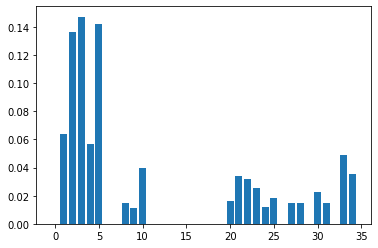

In [228]:
pyplot.bar([i for i in range(len(features.scores_))], features.scores_)
pyplot.show()

In [229]:
column_indices = sorted(range(len(features.scores_)), key=lambda i: features.scores_[i])[-12:]

In [230]:
columns_to_keep = []
for i in column_indices:
  columns_to_keep.append(features.feature_names_in_[i])

In [231]:
print(column_indices)
columns_to_keep

[30, 23, 22, 21, 34, 10, 33, 4, 1, 2, 5, 3]


['Cat_unemploye',
 'Cat_unemploye',
 'Cat_semi_pro',
 'Cat_sales',
 'Cat_oth_inst_',
 'Cat_given',
 'Cat_given',
 'Home_Expn',
 'Time_at_address',
 'Time_employed',
 'Balance',
 'Time_bank']

In [232]:
X = X.drop(columns=[col for col in X if col not in columns_to_keep])

In [233]:
X

,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Cat_given,Cat_sales,Cat_semi_pro,Cat_unemploye,Cat_unemploye,Cat_given,Cat_oth_inst_
0,0.023205,0.00,0.000000,0.190789,0.000000,1.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.396668,0.00,0.000000,0.184211,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.595002,0.25,0.608696,0.000000,0.043053,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.100754,0.10,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.515668,0.00,0.000000,0.300000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.109084,0.10,0.000000,0.305263,0.003914,1.0,0.0,0.0,0.0,0.0,1.0,0.0
425,0.049584,0.15,0.000000,0.368421,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0
426,0.059500,0.05,0.000000,0.555263,0.003914,1.0,0.0,0.0,0.0,0.0,1.0,0.0
427,0.190004,0.10,0.043478,0.105263,0.005871,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [234]:
rf = RandomForestRegressor()
rf.fit(X, y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_),X.columns), reverse=True))

Features sorted by their score:
[(0.2802, 'Time_bank'), (0.1752, 'Time_at_address'), (0.1695, 'Home_Expn'), (0.1675, 'Balance'), (0.1268, 'Time_employed'), (0.0252, 'Cat_given'), (0.0133, 'Cat_unemploye'), (0.0132, 'Cat_semi_pro'), (0.0102, 'Cat_sales'), (0.0076, 'Cat_unemploye'), (0.0059, 'Cat_oth_inst_'), (0.0054, 'Cat_given')]


In [236]:
#Let's filter the features to the most relevant (>0.05)
final_relevant = ['Time_bank', 'Home_Expn', 'Time_at_address', 'Balance', 'Time_employed']
X = X.drop(columns=[col for col in X if col not in final_relevant])

In [237]:
X

,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance
0,0.023205,0.00,0.000000,0.190789,0.000000
1,0.396668,0.00,0.000000,0.184211,0.000000
2,0.595002,0.25,0.608696,0.000000,0.043053
3,0.100754,0.10,0.000000,0.000000,0.000000
4,0.515668,0.00,0.000000,0.300000,0.000000
...,...,...,...,...,...
424,0.109084,0.10,0.000000,0.305263,0.003914
425,0.049584,0.15,0.000000,0.368421,0.000000
426,0.059500,0.05,0.000000,0.555263,0.003914
427,0.190004,0.10,0.043478,0.105263,0.005871


In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
x_tr=np.array(X_train)
x_te=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
print(x_tr.shape)
print(np.array(y_train).shape)

(343, 5)
(343,)


In [274]:
model = Sequential()
model.add(Dense(20, input_dim=5, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [275]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [276]:
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

In [277]:
# make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)

In [278]:
# summarize the first 5 cases
for i in range(5):
	print('{} => {} (expected {})'.format(X.iloc[i].tolist(), predictions[i], y[i]))

[0.023205077364088503, 0.0, 0.0, 0.1907894736842105, 0.0] => [0] (expected 0)
[0.39666800336908226, 0.0, 0.0, 0.18421052631578946, 0.0] => [0] (expected 0)
[0.5950020050536233, 0.25, 0.6086956521739131, 0.0, 0.04305283757338552] => [1] (expected 1)
[0.10075367134840849, 0.1, 0.0, 0.0, 0.0] => [1] (expected 1)
[0.515668404379807, 0.0, 0.0, 0.3, 0.0] => [0] (expected 0)


In [279]:
accuracy=model.evaluate(X_test,y_test)
print('Accuracy:',accuracy[1])

3/3 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8023
Accuracy: 0.8023256063461304
